<a href="https://colab.research.google.com/github/priyampnchl/image-to-waveform/blob/main/source/plotting_fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Fractals

This notebook shows plots of 2D Hilbert Curves, 3D hilbert Curves, and the Sierpinski Fractal Triangle.

#Hilbert Curves 
(or rather, Hilbert Fractals, as we will see they are not exactly "curves")

In [1]:
!pip install hilbertcurve
from hilbertcurve.hilbertcurve import HilbertCurve
from numpy import asarray
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def plotHilbertCurve(p,n=2):

  total=(n**p)**2
  hilbert_curve = HilbertCurve(p, n)
  distances = list(range(total))
  points = hilbert_curve.points_from_distances(distances) #array of x,y distances for [i]th element, points are like coordinates
  x_coords, y_coords = zip(*points)

  plt.figure(figsize=(22,10))
  plt.subplot(121)
  plt.plot(x_coords, y_coords)

This section will plot hilbert curves of orders 1 through 8. 

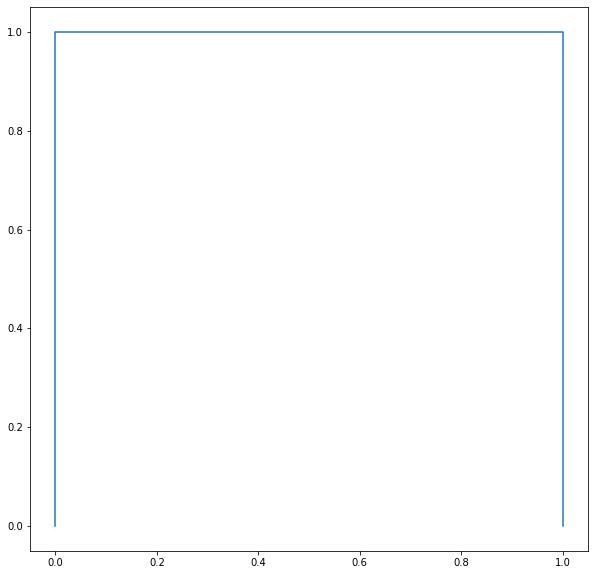

In [3]:
plotHilbertCurve(1)

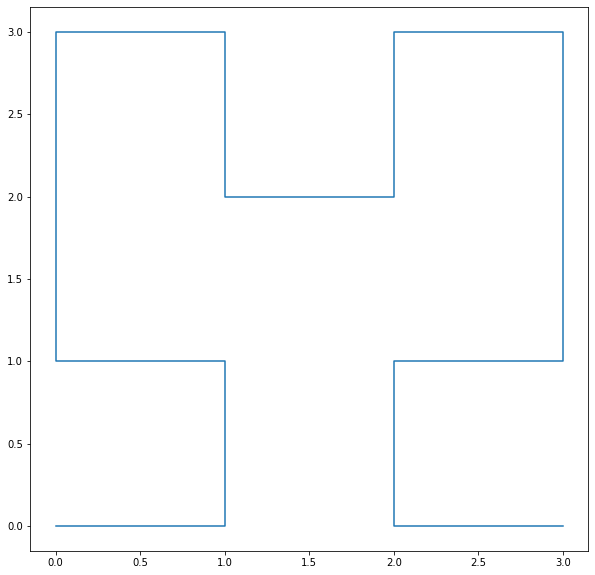

In [4]:
plotHilbertCurve(2)

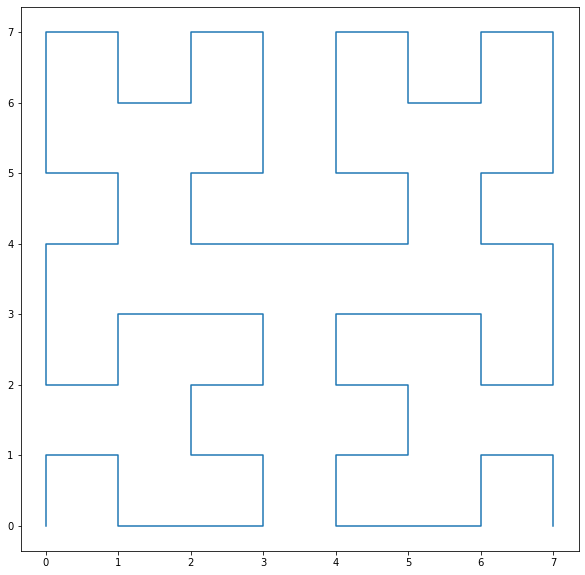

In [5]:
plotHilbertCurve(3)

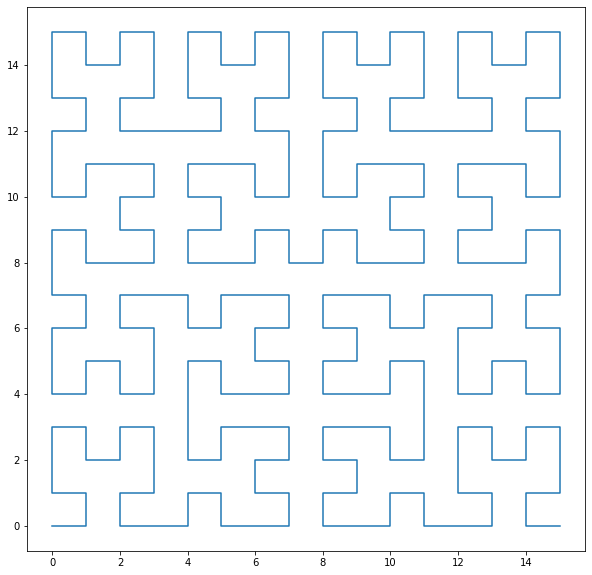

In [10]:
plotHilbertCurve(4)

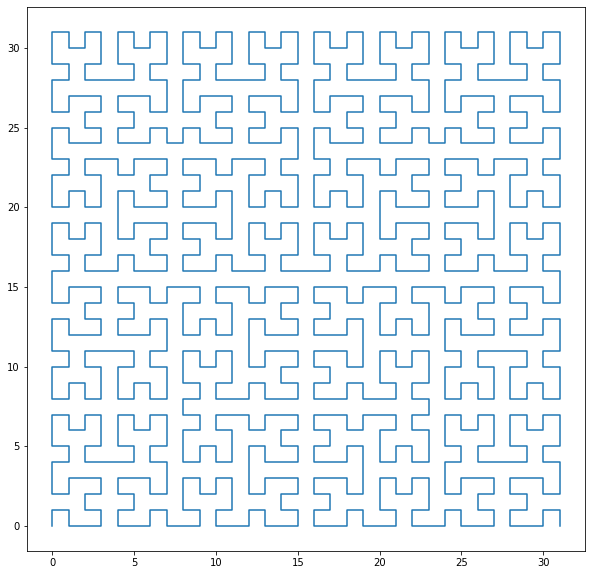

In [9]:
plotHilbertCurve(5)

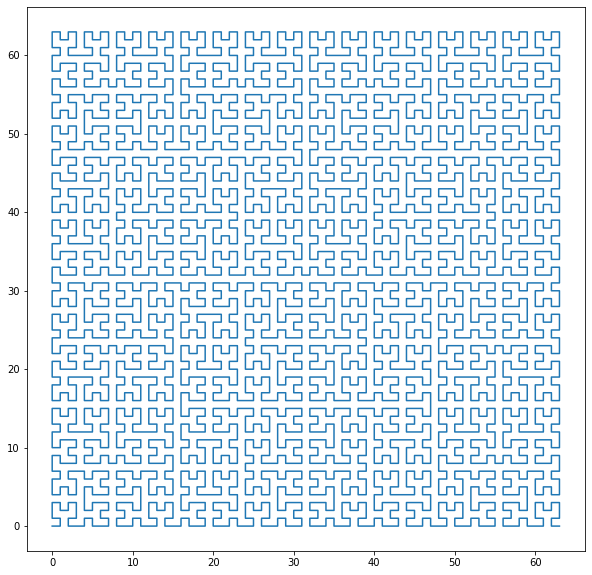

In [8]:
plotHilbertCurve(6)

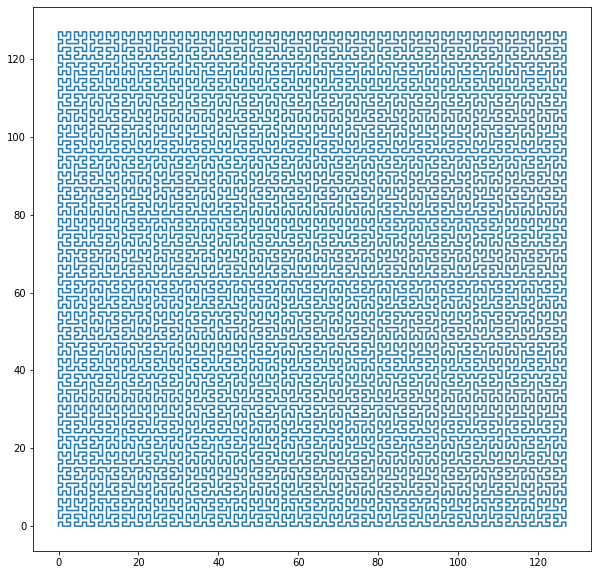

In [7]:
plotHilbertCurve(7)

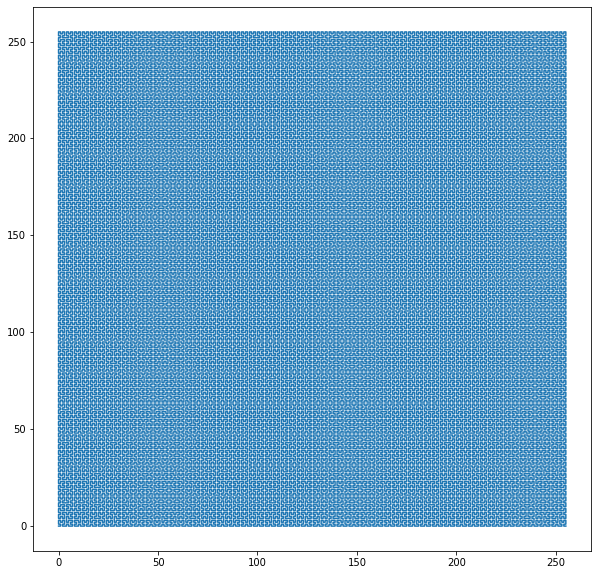

In [6]:
plotHilbertCurve(8)

#3D Hilbert Curves

This block shows Hilbert curves that fill 3D space, of various orders. 

(Basic code source: https://github.com/PrincetonLIPS/numpy-hilbert-curve)

In [11]:
!pip install numpy-hilbert-curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for numpy-hilbert-curve: filename=numpy_hilbert_curve-1.0.1-py3-none-any.whl size=6953 sha256=d9dd51b88c3d1c716ac503a7faf33d279fa5d2931357dfdc5c9c7e3cdf70e7ed
  Stored in directory: /root/.cache/pip/wheels/88/0e/52/d2ca6d509befd568d88e96819cf1368b2b795e3d4302a91e3b
Successfully built numpy-hilbert-curve


In [12]:
%matplotlib inline
import numpy as np
from hilbert import decode, encode
import matplotlib.pyplot as plt

def hilbert3d(p):
  n=3
  data = range(2**(n*p))
  locs = decode(data, n, p)

  H = encode(locs, n, p)

  plt.figure(figsize=(10,10))
  plt.subplot(121)
  ax = plt.axes(projection='3d')
  x_coords, y_coords, z_coords = zip(*locs)

  ax.plot3D(x_coords, y_coords, z_coords)

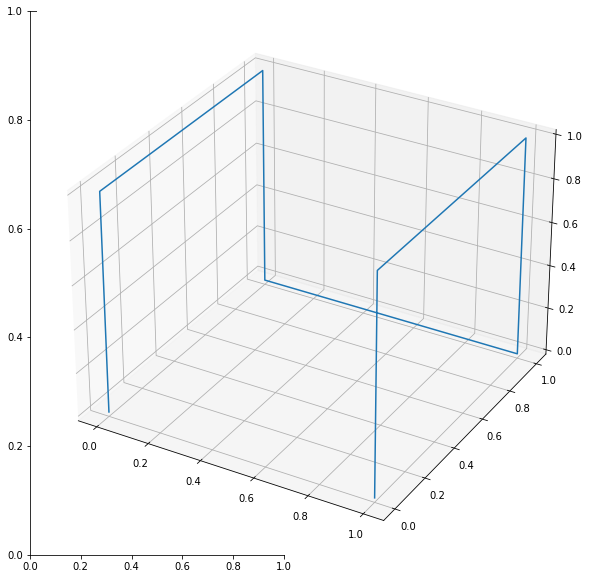

In [17]:
hilbert3d(1)

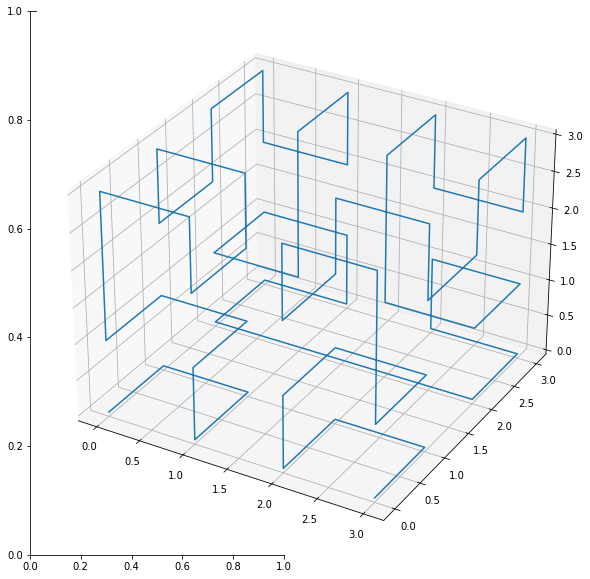

In [16]:
hilbert3d(2)

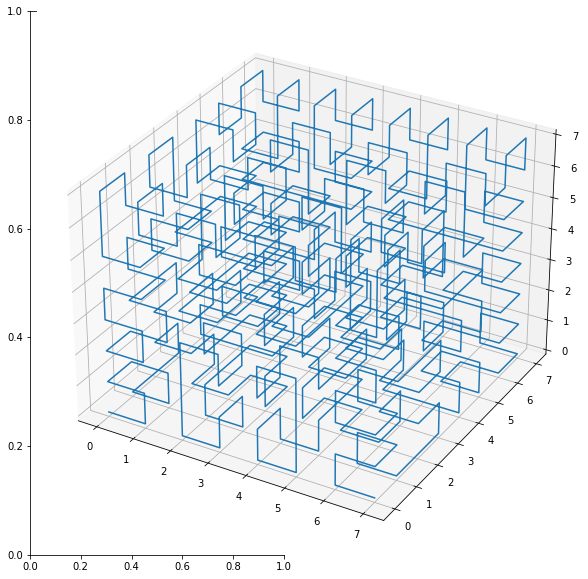

In [15]:
hilbert3d(3)

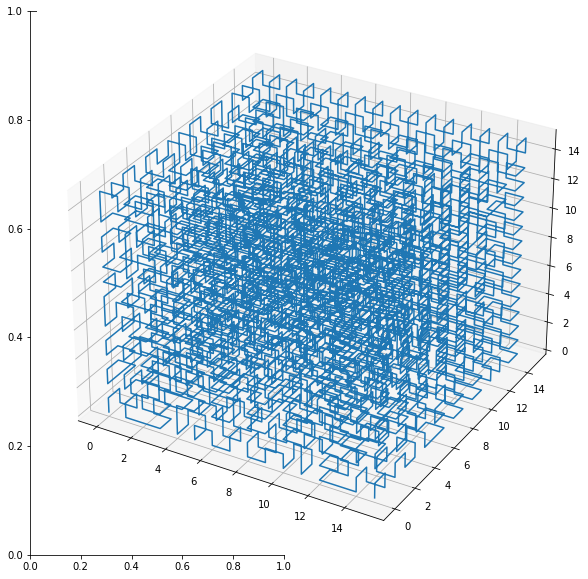

In [14]:
hilbert3d(4)

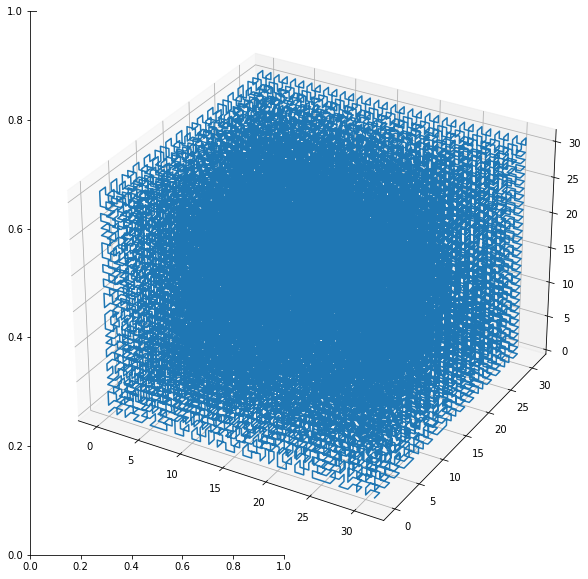

In [13]:
hilbert3d(5)

#More Fractals: Sierpinski Fractal
Also popularly known as Sierpinski "*Triangle*", because, well, it is a triangle.

It is drawn as follows:
1. Pick a random point in the triangle
2. Pick any of the three vertices of the triangle
3. Move to the midpoint of the line that joins the selected vertex and the initial point
4. Repeat 2,3 by making this new point the starting point 

After enough iterations the sierpinski triangle will emerge. In this example I have used 1 million points. 

The first image is the full triangle (1x1 units).

The second image is a 1/25th of the triangle (0.2x0.2 units)

The third image is a 1/400th of the triangle (0.05x0.05 units)

(code by https://isquared.digital/visualizations/2021-12-24-sierpinski-triangle/)

In [ ]:
import random
from operator import add

def generate_sierpinski_triangle(n: int):
    sierpinski_triangle = []  # final list of points

    # initial points
    A = (0.0, 0.0)
    B = (0.5, 1.0)
    C = (1.0, 0.0)
    triangle_vertices = [A, B, C]

    # starting point
    moving_point = random.choice(triangle_vertices)

    for i in range(n):
        offset_point = random.choice(triangle_vertices)
        moving_point = list(map(lambda x: x / 2.0, list(map(add, moving_point, offset_point))))
        sierpinski_triangle.append(moving_point.copy())
    
    return sierpinski_triangle

points=generate_sierpinski_triangle(1000000) #1 million points


In [ ]:
x_coords, y_coords = zip(*points)

def plot_triangle(xlim,ylim):
  plt.figure(figsize=(12,10))
  plt.xlim([0,xlim])
  plt.ylim([0,ylim])
  plt.scatter(x_coords,y_coords,s=5)

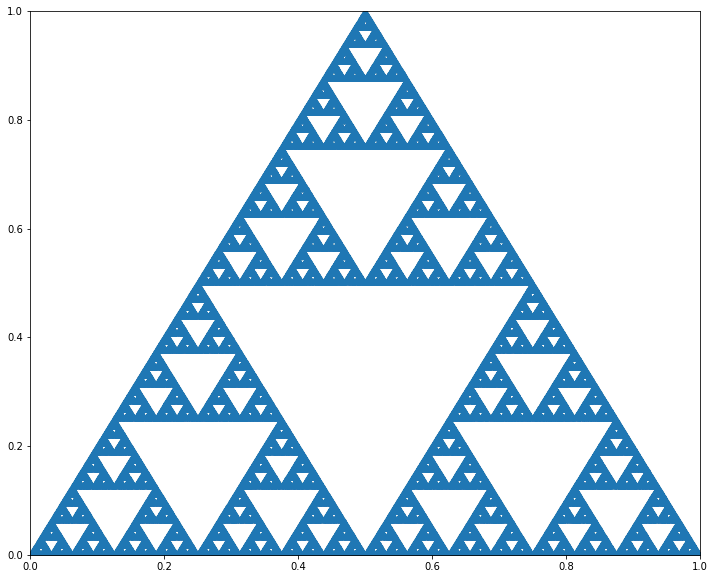

In [ ]:
plot_triangle(1,1)

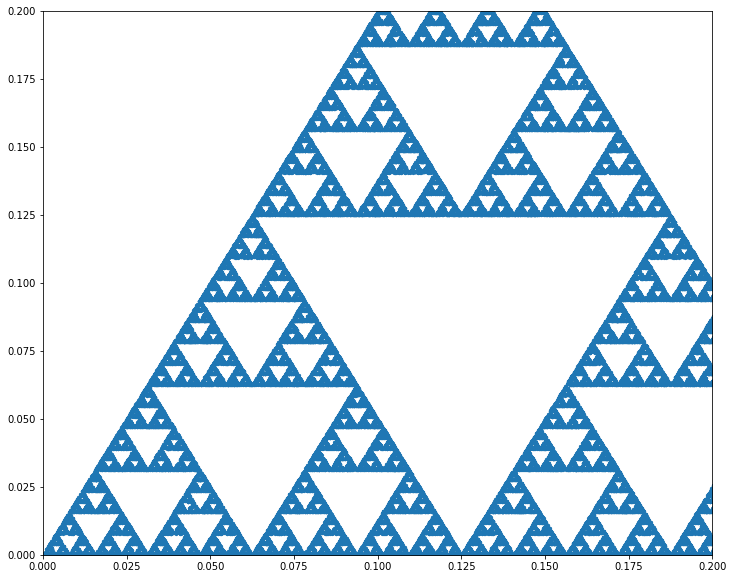

In [ ]:
plot_triangle(0.2,0.2)

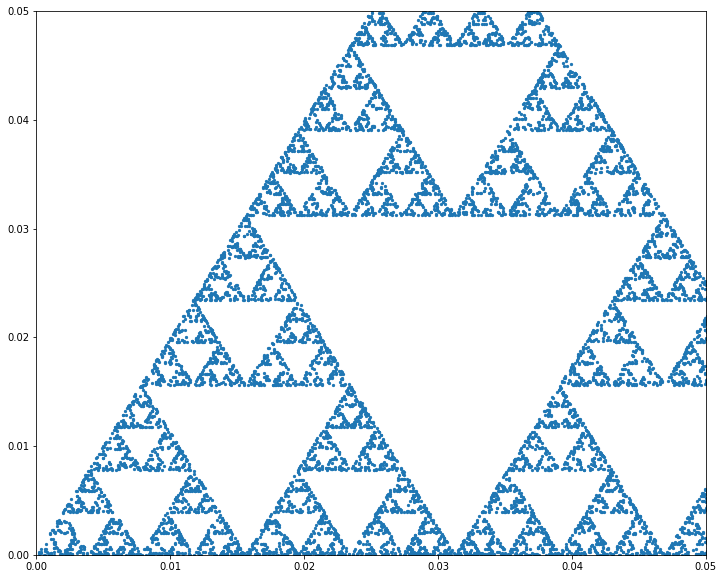

In [ ]:
plot_triangle(0.05,0.05)